# Aim 

Perform an in-depth exploratory data analysis (EDA) on a dataset to identify trends, patterns,
anomalies, and factors influencing performance.

# Project 1: General EDA

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Dataset Preview
original_df = pd.read_csv('Global_Superstore.csv')
df = original_df.copy()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24278,IN-2015-JF1541527-42095,4/1/2015,4/5/2015,Standard Class,JF-1541527,Jennifer Ferguson,Consumer,NaN,Liaoyang,...,FUR-TA-3442,Furniture,Tables,"Bevis Wood Table, with Bottom Storage",2614.69,7,0.30,-821.96,203.260,Medium
996,36249,CA-2015-AS10225140-42347,12/9/2015,12/13/2015,Second Class,AS-102251404,Alan Schoenberger,Corporate,94109.0,San Francisco,...,OFF-AP-3371,Office Supplies,Appliances,Belkin 8-Outlet Premiere SurgeMaster II Surge ...,69.48,1,0.00,20.84,12.040,High
997,30517,IN-2014-CK1259592-41929,10/17/2014,10/19/2014,Second Class,CK-1259592,Clytie Kelty,Consumer,NaN,Taupo,...,TEC-CO-3689,Technology,Copiers,"Canon Fax Machine, Laser",636.78,2,0.00,286.50,203.200,Critical
998,1408,MX-2014-SS2014018-41658,1/19/2014,1/26/2014,Standard Class,SS-2014018,Saphhira Shifley,Corporate,NaN,Araguaína,...,FUR-BO-3627,Furniture,Bookcases,"Bush Classic Bookcase, Traditional",2751.20,10,0.00,110.00,203.132,Medium


# Clean Data

■ Handle missing values by filling them with appropriate measures (mean, median, or placeholders) or by removing 
affected rows/columns.
        

In [3]:
# Finding null values
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [5]:
print(df['Postal Code'].unique())
df = df.fillna({'Postal Code':0})

[73120.    nan 98103. 76017. 12180. 94122. 90004. 10035. 39503. 94109.
 19134. 28540. 78745. 94110. 97756. 91104. 22204. 98105. 10009. 22980.
 46142.  3301. 98198. 19143.  2920. 10011. 90036. 89015. 19013. 37918.
 30318. 92646. 43229. 65807. 22901. 92037. 75061. 60653. 48205. 77581.
 42420. 46203. 97206. 85023. 77041. 61701. 97301. 85705. 77036. 40214.
 60505. 75217. 98002. 10701. 11561. 75007. 75220. 74133. 90045. 37087.
 43615. 90712. 62521. 80027. 98006. 59405.  6824. 19120. 33319. 18018.
 60623. 10024. 92804. 94513. 37211. 36116. 84604.]


In [6]:
df['Postal Code']

0      73120.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
995        0.0
996    94109.0
997        0.0
998        0.0
999        0.0
Name: Postal Code, Length: 1000, dtype: float64

 ■ Remove duplicates to ensure the dataset's integrity.
       

In [7]:
# Finding duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

0

■ Detect and handle outliers using statistical techniques (e.g., IQR or Z-scores).

1. Handleing outliers using IQR Technique

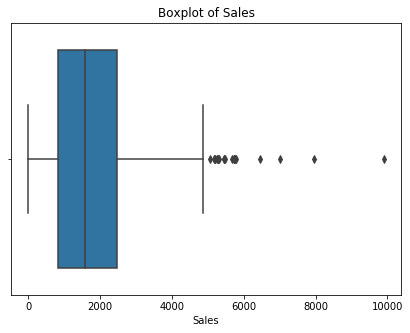

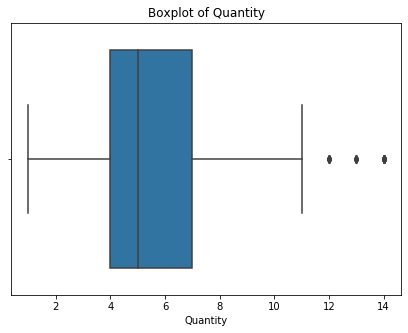

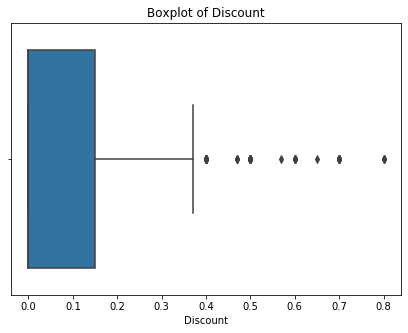

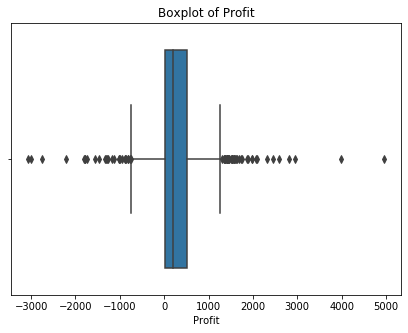

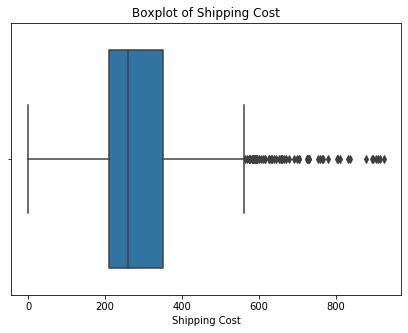

In [8]:
# List of continuous numerical columns
continuous_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Create boxplots for each continuous variable
for column in continuous_columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,10469.437000,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,25994.166002,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,0.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,0.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,0.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,0.000000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


In [10]:

# Calculate Q1, Q3, and IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
iqr_outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Outliers in 'Sales' (using IQR Technique):")
iqr_outliers

Outliers in 'Sales' (using IQR Technique):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,0.0,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
7,31192,IN-2013-MB1808592-41378,4/14/2013,4/18/2013,Standard Class,MB-1808592,Mick Brown,Consumer,0.0,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,878.38,High
17,12069,ES-2015-PJ1883564-42255,9/8/2015,9/14/2015,Standard Class,PJ-1883564,Patrick Jones,Corporate,0.0,Prato,...,OFF-AP-4743,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,778.32,Low
23,13528,ES-2014-LB16795139-41697,2/27/2014,3/1/2014,Second Class,LB-16795139,Laurel Beltran,Home Office,0.0,Edinburgh,...,OFF-AP-4960,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",5273.70,10,0.0,1898.40,730.91,High
42,25795,IN-2015-VG2180558-42273,9/26/2015,9/28/2015,Second Class,VG-2180558,Vivek Grady,Corporate,0.0,Thiruvananthapuram,...,FUR-BO-5951,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",5667.87,13,0.0,2097.03,658.35,Medium
43,16681,ES-2013-GT14710139-41621,12/13/2013,12/17/2013,Standard Class,GT-14710139,Greg Tran,Consumer,0.0,Huddersfield,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",5785.02,9,0.0,404.73,656.73,High
64,25314,IN-2015-DB1340527-42022,1/18/2015,1/23/2015,Standard Class,DB-1340527,Denny Blanton,Consumer,0.0,Wuxi,...,FUR-CH-5774,Furniture,Chairs,"SAFCO Executive Leather Armchair, Black",5049.00,11,0.0,656.37,595.50,High
80,13879,ES-2015-HG1484545-42327,11/19/2015,11/23/2015,Standard Class,HG-1484545,Harry Greene,Consumer,0.0,Lille,...,FUR-CH-4654,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",5729.35,14,0.1,63.55,572.95,High
81,50788,MO-2015-DP310586-42305,10/28/2015,10/30/2015,Second Class,DP-310586,Dave Poirier,Corporate,0.0,Meknes,...,TEC-CO-3710,Technology,Copiers,"Canon Wireless Fax, Laser",5301.24,14,0.0,2597.28,568.45,Medium
162,45807,SA-2015-LC7050110-42236,8/20/2015,8/25/2015,Standard Class,LC-7050110,Liz Carlisle,Consumer,0.0,Jeddah,...,TEC-PH-3806,Technology,Phones,"Cisco Smart Phone, Full Size",5211.12,8,0.0,1146.24,463.98,Medium


2. Handleing outliers using Z-scores Technique

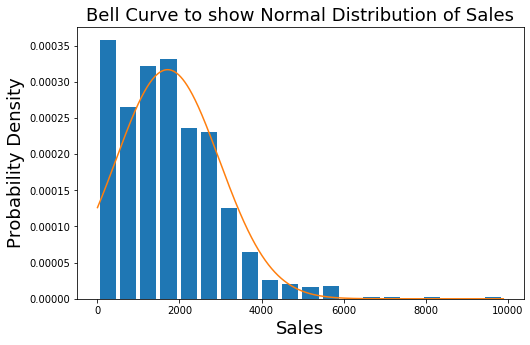

In [11]:
plt.figure(figsize=(8,5))

plt.hist(df.Sales, bins=20 , rwidth=.8 , density=True)
plt.xlabel('Sales', fontsize=18)
plt.ylabel('Probability Density' , fontsize=18)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
plt.title('Bell Curve to show Normal Distribution of Sales', fontsize=18)

rng = np.arange(df['Sales'].min() , df['Sales'].max() , .1)
plt.plot(rng , norm.pdf(rng , df.Sales.mean() , df.Sales.std() ))


In [12]:
# Creating new column z-scores
df['z-scores'] = (df['Sales']  -  df['Sales'].mean()) / df['Sales'].std()

# Define bounds
lower_limit = df['Sales'].mean() - 3*df['Sales'].std()
upper_limit = df['Sales'].mean() + 3*df['Sales'].std()

# Find outliers
z_score_outliers = df[(df['Sales'] < lower_limit) | (df['Sales'] > upper_limit)]

print("Outliers in 'Sales' (using Z-scores Technique):")
z_score_outliers


Outliers in 'Sales' (using Z-scores Technique):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,z-scores
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,0.0,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2.751025
7,31192,IN-2013-MB1808592-41378,4/14/2013,4/18/2013,Standard Class,MB-1808592,Mick Brown,Consumer,0.0,Hamilton,...,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,878.38,High,2.806352
17,12069,ES-2015-PJ1883564-42255,9/8/2015,9/14/2015,Standard Class,PJ-1883564,Patrick Jones,Corporate,0.0,Prato,...,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,778.32,Low,4.961415
23,13528,ES-2014-LB16795139-41697,2/27/2014,3/1/2014,Second Class,LB-16795139,Laurel Beltran,Home Office,0.0,Edinburgh,...,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",5273.70,10,0.0,1898.40,730.91,High,2.829271
42,25795,IN-2015-VG2180558-42273,9/26/2015,9/28/2015,Second Class,VG-2180558,Vivek Grady,Corporate,0.0,Thiruvananthapuram,...,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",5667.87,13,0.0,2097.03,658.35,Medium,3.142293
43,16681,ES-2013-GT14710139-41621,12/13/2013,12/17/2013,Standard Class,GT-14710139,Greg Tran,Consumer,0.0,Huddersfield,...,Technology,Phones,"Motorola Smart Phone, Cordless",5785.02,9,0.0,404.73,656.73,High,3.235325
64,25314,IN-2015-DB1340527-42022,1/18/2015,1/23/2015,Standard Class,DB-1340527,Denny Blanton,Consumer,0.0,Wuxi,...,Furniture,Chairs,"SAFCO Executive Leather Armchair, Black",5049.00,11,0.0,656.37,595.50,High,2.650830
80,13879,ES-2015-HG1484545-42327,11/19/2015,11/23/2015,Standard Class,HG-1484545,Harry Greene,Consumer,0.0,Lille,...,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",5729.35,14,0.1,63.55,572.95,High,3.191116
81,50788,MO-2015-DP310586-42305,10/28/2015,10/30/2015,Second Class,DP-310586,Dave Poirier,Corporate,0.0,Meknes,...,Technology,Copiers,"Canon Wireless Fax, Laser",5301.24,14,0.0,2597.28,568.45,Medium,2.851141
162,45807,SA-2015-LC7050110-42236,8/20/2015,8/25/2015,Standard Class,LC-7050110,Liz Carlisle,Consumer,0.0,Jeddah,...,Technology,Phones,"Cisco Smart Phone, Full Size",5211.12,8,0.0,1146.24,463.98,Medium,2.779574


In [13]:
# Removing outliers
df = df[abs(df['z-scores']) <= 3]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,z-scores
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,-1.182453
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,0.0,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,1.587013
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,0.0,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2.751025
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,0.0,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,0.938296
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,0.0,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,0.891005


In [14]:
# Removing z-score column
df = df.drop('z-scores', axis=1)

# Statistical Analysis

In [15]:
print("\nMean Sales:", df['Sales'].mean())
print("\nMedian Sales:", df['Sales'].median())
print("\nStandard Deviation of Sales:", df['Sales'].std())
print("\nVariance of Sales:", df['Sales'].var())


Mean Sales: 1661.9041212121206

Median Sales: 1581.255

Standard Deviation of Sales: 1158.937833219683

Variance of Sales: 1343136.9012679337


In [16]:
# Correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']].corr()
correlation_matrix

,Sales,Profit,Quantity,Discount,Shipping Cost
Sales,1.000000,0.459830,0.528582,-0.181395,0.660334
Profit,0.459830,1.000000,0.089713,-0.535049,0.277931
Quantity,0.528582,0.089713,1.000000,0.046006,0.339511
Discount,-0.181395,-0.535049,0.046006,1.000000,-0.165339
Shipping Cost,0.660334,0.277931,0.339511,-0.165339,1.000000


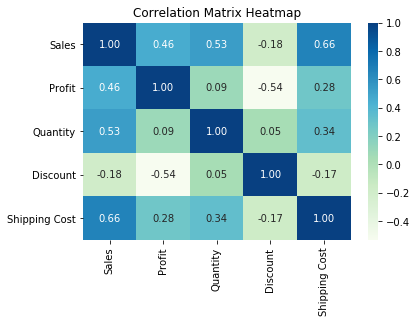

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap="GnBu", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

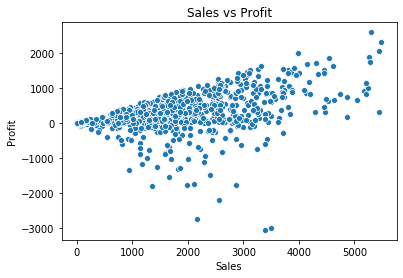

In [18]:
# How Sales affects Profit 

sns.scatterplot(x=df['Sales'], y=df['Profit'])
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


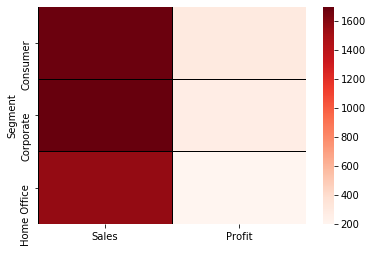

In [19]:
# Segment-wise Analysis
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].mean()
sns.heatmap(segment_analysis, cmap='Reds', linecolor='Black', linewidth=.005)

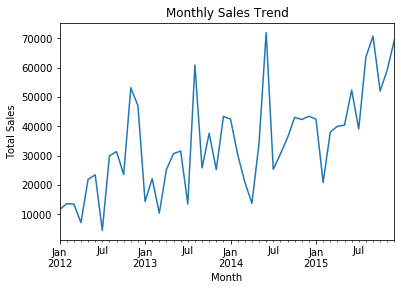

In [20]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Monthly Sales Trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Dataset source:
    https://github.com/yannie28/Global-Superstore/blob/master/Global_Superstore(CSV).csv


Summary

Data cleaning :

    1. Handled missing values by filling them 0
    2. Remove duplicate rows
    3. Detect and handle outliers using IQR and Z-scores statistical techniques 


Statistical Analysis:
    
    1) Correlation Matrix Heatmap indicates :
        - Quantity increases with Discount
        - Profit decreases with Discount 
        - Discount slightly affects Shipping cost
    2) Scatter Plot :
        Profit increases slightly against Sales
    3) Segment-wise Analysis:
        Corporate and Consumer segments are having more Sales than Home-Office and so with profit
    4) Monthly Sales Trend:
        Every year Sales increases but around month of July
        